Neural Networks for Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:
df_track = pd.read_csv('tracks.csv', low_memory=False)
df_track.dropna(inplace=True)  
df_track.drop_duplicates(subset='id' ,keep='first', inplace=True)
df_track.head()

,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,...,features_duration_ms,time_signature,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre
0,4rjA5kJJWbwU1prXCvg6Fk,Grey,1,290479,False,52,5,Kölsch,album,1989,...,290479,3,275.90530,0.020,1.000,0.500,0.525,705.0,234.0,minimal-techno
1,6xzpUzzIquIyUzTLbbgSdI,Thrown,1,539229,False,45,5,Kiasmos,album,Kiasmos,...,539229,4,517.28253,0.678,0.326,0.410,0.589,1074.0,269.0,minimal-techno
2,56tXgHlSHCfgmGhwVXNizc,Routine,1,264200,False,39,5,Joris Delacroix,album,Night Visions,...,264200,3,259.04180,0.847,0.457,0.904,0.760,516.0,171.0,minimal-techno
3,0s3wIBczp6TdSJ2y8cveJl,Confronted - Anfisa Letyago Stranger Remix,1,387413,False,0,6,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,...,387414,4,387.41360,0.882,0.498,0.512,0.503,826.0,207.0,minimal-techno
4,4PSbDDd1LRYMhqPXvza6I2,Jupiter Sunrise,1,248956,False,0,1,Kollektiv Turmstrasse,compilation,10 Years Diynamic,...,248957,4,239.63574,0.882,1.000,0.474,0.459,493.0,123.0,minimal-techno


In [3]:
genre_map = {
    'minimal-techno': 'Electronic',
    'hip-hop': 'Hip-Hop/Rap',
    'honky-tonk': 'Country',
    'house': 'Electronic',
    'idm': 'Electronic',
    'indian': 'World',
    'indie-pop': 'Indie',
    'indie': 'Indie',
    'industrial': 'Electronic',
    'iranian': 'World',
    'j-dance': 'Electronic',
    'j-idol': 'Pop',
    'j-pop': 'Pop',
    'j-rock': 'Rock',
    'jazz': 'Jazz',
    'k-pop': 'Pop',
    'alternative': 'Alternative',
    'ambient': 'Electronic',
    'anime': 'Pop',
    'black-metal': 'Metal',
    'bluegrass': 'Country',
    'blues': 'Blues',
    'brazil': 'World',
    'breakbeat': 'Electronic',
    'sleep': 'Ambient',
    'songwriter': 'Folk',
    'soul': 'R&B/Soul',
    'spanish': 'World',
    'study': 'Ambient',
    'swedish': 'Pop',
    'synth-pop': 'Electronic',
    'tango': 'World',
    'techno': 'Electronic',
    'trance': 'Electronic',
    'trip-hop': 'Electronic',
    'turkish': 'World',
    'world-music': 'World',
    'edm': 'Electronic',
    'electro': 'Electronic',
    'electronic': 'Electronic',
    'emo': 'Alternative',
    'folk': 'Folk',
    'forro': 'World',
    'french': 'World',
    'funk': 'Funk',
    'garage': 'Electronic',
    'german': 'World',
    'gospel': 'Gospel',
    'goth': 'Alternative',
    'grindcore': 'Metal',
    'groove': 'R&B/Soul',
    'grunge': 'Rock',
    'guitar': 'Rock',
    'acoustic': 'Folk',
    'afrobeat': 'World',
    'alt-rock': 'Rock',
    'happy': 'Pop',
    'hard-rock': 'Rock',
    'hardcore': 'Metal',
    'hardstyle': 'Electronic',
    'heavy-metal': 'Metal',
    'mandopop': 'Pop',
    'metal': 'Metal',
    'metalcore': 'Metal',
    'pop-film': 'Pop',
    'pop': 'Pop',
    'power-pop': 'Pop',
    'progressive-house': 'Electronic',
    'psych-rock': 'Rock',
    'punk-rock': 'Rock',
    'punk': 'Rock',
    'r-n-b': 'R&B/Soul',
    'reggae': 'Reggae',
    'reggaeton': 'Reggaeton',
    'rock-n-roll': 'Rock',
    'rock': 'Rock',
    'rockabilly': 'Rock',
    'romance': 'Pop',
    'sad': 'Pop',
    'salsa': 'Latino',
    'samba': 'Latino',
    'sertanejo': 'Latino',
    'show-tunes': 'Musical',
    'ska': 'Reggae',
    'mpb': 'World',
    'new-age': 'New Age',
    'kids': 'Children',
    'latin': 'Latino',
    'latino': 'Latino',
    'malay': 'World',
    'chicago-house': 'Electronic',
    'children': 'Children',
    'chill': 'Ambient',
    'classical': 'Classical',
    'club': 'Electronic',
    'comedy': 'Comedy',
    'country': 'Country',
    'opera': 'Classical',
    'pagode': 'World',
    'party': 'Pop',
    'piano': 'Classical',
    'british': 'World',
    'cantopop': 'Pop',
    'dance': 'Electronic',
    'dancehall': 'Reggae',
    'death-metal': 'Metal',
    'deep-house': 'Electronic',
    'detroit-techno': 'Electronic',
    'disco': 'Electronic',
    'disney': 'Children',
    'drum-and-bass': 'Electronic',
    'dub': 'Reggae',
    'dubstep': 'Electronic'
}

df_track['genre_cluster'] = df_track['genre'].replace(genre_map)


In [4]:
columns = ['duration_ms', 'popularity', 'danceability', 'energy', 'loudness', 'speechiness',
           'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'start_of_fade_out', 
           'n_beats']
df_sub = df_track[columns]
df_sub

,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,start_of_fade_out,n_beats
0,290479,52,0.532,0.517,-9.846,0.4930,0.54700,0.535000,0.0854,0.2390,186.001,275.90530,705.0
1,539229,45,0.750,0.340,-12.759,0.0326,0.16700,0.648000,0.1060,0.1450,120.016,517.28253,1074.0
2,264200,39,0.801,0.639,-10.681,0.1040,0.02900,0.466000,0.0688,0.3200,118.052,259.04180,516.0
3,387413,0,0.675,0.543,-11.983,0.0639,0.04840,0.719000,0.1120,0.0374,128.990,387.41360,826.0
4,248956,0,0.761,0.671,-13.346,0.0418,0.51300,0.917000,0.1150,0.1190,120.003,239.63574,493.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109542,209655,23,0.466,0.982,-2.674,0.0752,0.00841,0.323000,0.3580,0.3700,173.958,200.10376,585.0
109543,205724,56,0.666,0.720,-4.483,0.0269,0.37100,0.000000,0.0793,0.3120,99.970,200.98611,339.0
109544,195853,80,0.813,0.627,-5.018,0.0486,0.07710,0.000616,0.1310,0.8010,130.011,189.48643,417.0
109545,208698,60,0.653,0.779,-3.133,0.0392,0.37200,0.000001,0.0392,0.3870,108.074,197.41605,359.0


Data Partitioning

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [6]:
X = df_sub.values
y = df_track['genre_cluster'].values
X.shape, y.shape

((89562, 13), (89562,))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

Data Normalization

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Skelearn Multilayer 

In [10]:
from sklearn.neural_network import MLPClassifier

In [11]:
# Initialize MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, alpha=0.0001,
                    solver='adam', verbose=10, random_state=100, tol=0.0001)

# Fit the classifier to the training data
clf.fit(X_train, y_train)


Iteration 1, loss = 2.29087256
Iteration 2, loss = 1.99008515
Iteration 3, loss = 1.93475443
Iteration 4, loss = 1.90252340
Iteration 5, loss = 1.88047756
Iteration 6, loss = 1.86478922
Iteration 7, loss = 1.85315645
Iteration 8, loss = 1.84275961
Iteration 9, loss = 1.83377370
Iteration 10, loss = 1.82611719
Iteration 11, loss = 1.81917866
Iteration 12, loss = 1.81308200
Iteration 13, loss = 1.80643784
Iteration 14, loss = 1.80146355
Iteration 15, loss = 1.79536170
Iteration 16, loss = 1.78994734
Iteration 17, loss = 1.78516011
Iteration 18, loss = 1.78027528
Iteration 19, loss = 1.77601878
Iteration 20, loss = 1.77203834
Iteration 21, loss = 1.76833253
Iteration 22, loss = 1.76446558
Iteration 23, loss = 1.76076110
Iteration 24, loss = 1.75743082
Iteration 25, loss = 1.75435541
Iteration 26, loss = 1.75143567
Iteration 27, loss = 1.74849567
Iteration 28, loss = 1.74558331
Iteration 29, loss = 1.74316215
Iteration 30, loss = 1.74109880
Iteration 31, loss = 1.73856099
Iteration 32, los

MLPClassifier(max_iter=500, random_state=100, verbose=10)

In [12]:
# Predict on the test data
y_pred = clf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')


Accuracy: 0.46
F1 Score: 0.44
ROC AUC: 0.89


In [13]:
# Perform cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
print(f'Cross-validation Accuracy: {np.mean(cv_scores):.2f} +/- {np.std(cv_scores):.2f}')


Iteration 1, loss = 2.34441173
Iteration 2, loss = 2.01463436
Iteration 3, loss = 1.95560075
Iteration 4, loss = 1.92098617
Iteration 5, loss = 1.89740610
Iteration 6, loss = 1.88025557
Iteration 7, loss = 1.86642849
Iteration 8, loss = 1.85564687
Iteration 9, loss = 1.84655476
Iteration 10, loss = 1.83877168
Iteration 11, loss = 1.83122115
Iteration 12, loss = 1.82468528
Iteration 13, loss = 1.81895126
Iteration 14, loss = 1.81322237
Iteration 15, loss = 1.80797363
Iteration 16, loss = 1.80367308
Iteration 17, loss = 1.80004755
Iteration 18, loss = 1.79444438
Iteration 19, loss = 1.79084041
Iteration 20, loss = 1.78735342
Iteration 21, loss = 1.78295366
Iteration 22, loss = 1.78003352
Iteration 23, loss = 1.77622411
Iteration 24, loss = 1.77385113
Iteration 25, loss = 1.76980784
Iteration 26, loss = 1.76661925
Iteration 27, loss = 1.76402081
Iteration 28, loss = 1.76131346
Iteration 29, loss = 1.75931689
Iteration 30, loss = 1.75604178
Iteration 31, loss = 1.75420863
Iteration 32, los

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [15]:
params = {
    'hidden_layer_sizes': [(128, 64, 32), (128, 32), (64, 32), (100, 100, 100)],
    'alpha': [0.1, 0.01, 0.001, 0.002]
}


In [16]:
rscv = RandomizedSearchCV(estimator=MLPClassifier(max_iter=100, solver='adam', random_state=100),
                          param_distributions=params,
                          n_iter=10,  
                          cv=5,  
                          random_state=100,
                          ) 



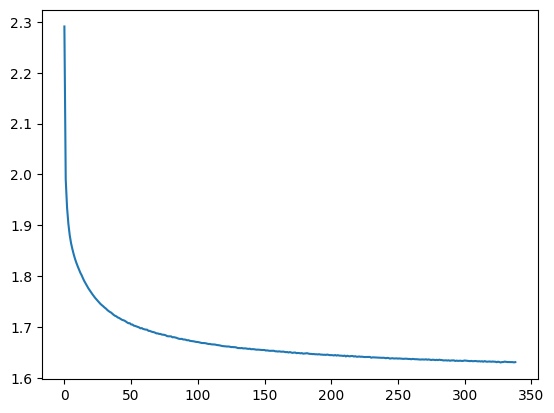

In [17]:
plt.plot(clf.loss_curve_)
plt.show()

In [18]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1,
                    learning_rate='adaptive',
                    activation='tanh', early_stopping=False,
                    momentum=0.9, random_state=0, max_iter=500)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.47645986080613345
F1-score [0.05921053 0.63470032 0.16727273 0.44814341 0.4966642  0.87477314
 0.49273678 0.61155971 0.20730503 0.30714286 0.069869   0.28343313
 0.06879607 0.58695652 0.47011952 0.62611704 0.27210884 0.54135338
 0.44019997 0.14321608 0.27710843 0.         0.36985976 0.4261309 ]
              precision    recall  f1-score   support

 Alternative       0.20      0.03      0.06       779
     Ambient       0.62      0.65      0.63       778
       Blues       0.56      0.10      0.17       234
    Children       0.50      0.41      0.45       863
   Classical       0.50      0.49      0.50       678
      Comedy       0.95      0.81      0.87       298
     Country       0.49      0.50      0.49       851
  Electronic       0.53      0.72      0.61      5973
        Folk       0.31      0.16      0.21       673
        Funk       0.48      0.23      0.31       191
      Gospel       0.31      0.04      0.07       203
 Hip-Hop/Rap       0.33      0.25      0.28 

C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

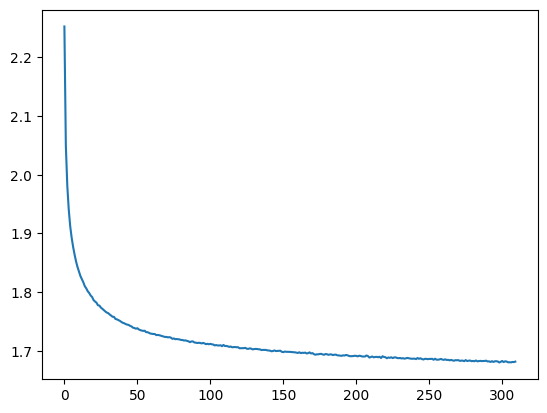

In [19]:
plt.plot(clf.loss_curve_)
plt.show()

In [20]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32,), alpha=0.1, learning_rate='adaptive',
                    activation='tanh', early_stopping=True, momentum=0.9, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.46015854702445197
F1-score [0.02881152 0.63741007 0.         0.44366608 0.47568988 0.86738351
 0.45813397 0.60490825 0.15968064 0.24291498 0.02857143 0.17112299
 0.02292264 0.53070175 0.45128779 0.63654793 0.18313253 0.51826087
 0.41328413 0.09022556 0.24873737 0.         0.37359793 0.41583477]
              precision    recall  f1-score   support

 Alternative       0.22      0.02      0.03       779
     Ambient       0.72      0.57      0.64       778
       Blues       0.00      0.00      0.00       234
    Children       0.45      0.44      0.44       863
   Classical       0.43      0.53      0.48       678
      Comedy       0.93      0.81      0.87       298
     Country       0.47      0.45      0.46       851
  Electronic       0.54      0.69      0.60      5973
        Folk       0.24      0.12      0.16       673
        Funk       0.54      0.16      0.24       191
      Gospel       0.43      0.01      0.03       203
 Hip-Hop/Rap       0.38      0.11      0.17 

C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

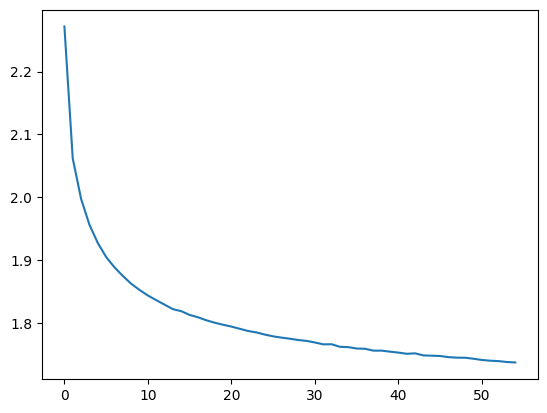

In [21]:
plt.plot(clf.loss_curve_)
plt.show()

# Hyperparameter tuning

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV 1/2; 1/3] START alpha=0.002, hidden_layer_sizes=(128, 32)...................
[CV 1/2; 1/3] END alpha=0.002, hidden_layer_sizes=(128, 32);, score=0.449 total time=  30.9s
[CV 2/2; 1/3] START alpha=0.002, hidden_layer_sizes=(128, 32)...................
[CV 2/2; 1/3] END alpha=0.002, hidden_layer_sizes=(128, 32);, score=0.450 total time=  36.8s
[CV 1/2; 2/3] START alpha=0.001, hidden_layer_sizes=(128, 32)...................
[CV 1/2; 2/3] END alpha=0.001, hidden_layer_sizes=(128, 32);, score=0.452 total time=  30.1s
[CV 2/2; 2/3] START alpha=0.001, hidden_layer_sizes=(128, 32)...................
[CV 2/2; 2/3] END alpha=0.001, hidden_layer_sizes=(128, 32);, score=0.446 total time=  42.2s
[CV 1/2; 3/3] START alpha=0.001, hidden_layer_sizes=(64, 32)....................
[CV 1/2; 3/3] END alpha=0.001, hidden_layer_sizes=(64, 32);, score=0.453 total time=  26.2s
[CV 2/2; 3/3] START alpha=0.001, hidden_layer_sizes=(64, 32)............

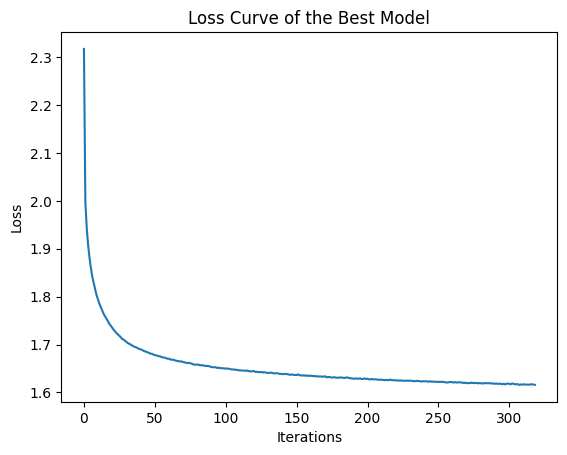

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier

# Definizione dei parametri di ricerca
params = {
    'hidden_layer_sizes': [(128, 64, 32), (128, 32), (64, 32), (100, 100, 100)],
    'alpha': [0.1, 0.01, 0.001, 0.002]
}

# Inizializzazione del RandomizedSearchCV
rscv = RandomizedSearchCV(estimator=MLPClassifier(max_iter=500, solver='adam', random_state=100),
                          param_distributions=params,
                          n_iter=3,  # Numero di combinazioni da provare
                          cv=2,  # Numero di folds per la cross-validation
                          random_state=100,
                          verbose=10,  # Per visualizzare l'avanzamento della ricerca
                          )

# Esecuzione della ricerca
rscv.fit(X_train, y_train)

# Migliori parametri trovati
print("Best parameters found: ", rscv.best_params_)

# Migliore stima del modello
best_clf = rscv.best_estimator_

# Predizione sui dati di test con il miglior modello
y_pred_best = best_clf.predict(X_test)

# Valutazione delle prestazioni del miglior modello
accuracy_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average='weighted')
roc_auc_best = roc_auc_score(y_test, best_clf.predict_proba(X_test), multi_class='ovr')

print(f'Best Model Accuracy: {accuracy_best:.2f}')
print(f'Best Model F1 Score: {f1_best:.2f}')
print(f'Best Model ROC AUC: {roc_auc_best:.2f}')

print('Best Model Classification Report:')
print(classification_report(y_test, y_pred_best))

# Grafico della loss per il miglior modello
plt.plot(best_clf.loss_curve_)
plt.title('Loss Curve of the Best Model')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()
